## Clustering Assignment
 
##### Assignment instructions:

1. List the types of clustering and give one real world example that you could come up with for each and justify your choice. 
    - STL-10: http://cs.stanford.edu/˜acoates/stl10/ 
    - Labeled Faces in the Wild: http://vis-www.cs.umass.edu/lfw/  Choose choice of your library for K-means clustering. Go out and grab an image data set like:
        - CIFAR-10 or CIFAR-100: http://www.cs.toronto.edu/˜kriz/cifar.html 
        - MNIST Handwritten Digits: http://yann.lecun.com/exdb/mnist/ 
        - Small NORB (toys): http://www.cs.nyu.edu/˜ylclab/data/norb-v1.0-small/ 
        - Street View Housing Numbers: http://ufldl.stanford.edu/housenumbers/
         
2. Figure out how to load it into your environment and turn it into a set of vectors. Run K-Means on it for a few different K and show some results from the fit. What do the mean images look like? What are some representative images from each of the clusters? Are the results wildly different for different restarts and/or different K? Plot the K-Means objective function (distortion measure) as a function of iteration and verify that it never increases.   
3. Implement K-Means clustering from scratch and apply the choice of your dataset you used above and compare the results.  

#### Upload Kaggle json

In [1]:
# Colab's file access feature
from google.colab import files

#retrieve uploaded file
uploaded = files.upload()

#print results
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes


#### Download data set files

In [2]:
!kaggle competitions download -c digit-recognizer

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


### Dependencies

In [0]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")

#### Load data set

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
train.head()

Train set shape: (42000, 785)
Test set shape: (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
labels = train['label']
train.drop('label', axis=1, inplace=True)
X_train, X_val, Y_train, Y_val = train_test_split(train, labels.values, test_size=0.2, random_state=0)
print('Train set shape:', X_train.shape)

Train set shape: (33600, 784)


In [0]:
preprocess = make_column_transformer((list(X_train.columns), StandardScaler()))

## Applying K-Means Clustering to the MNIST data set

In [7]:
model = make_pipeline(
        preprocess,
        KMeans(n_clusters=10, n_jobs=-1))

model.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pix..., n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [0]:
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)

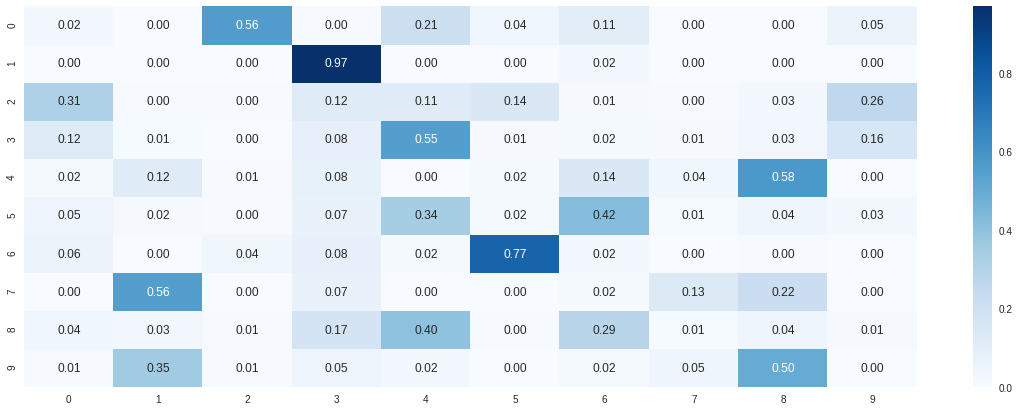

In [9]:
cnf_matrix = confusion_matrix(Y_train, train_pred)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=range(10), columns=range(10))
plt.figure(figsize=(20,7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

### K-Means using PCA as a preprocess method

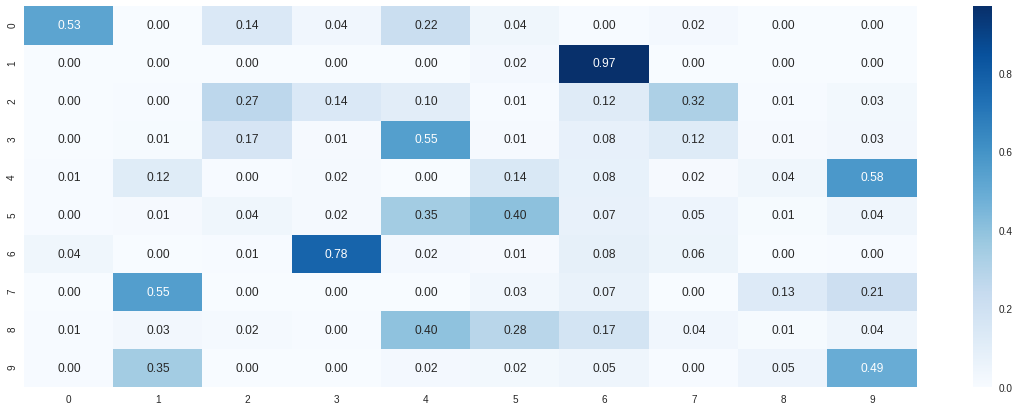

In [10]:
pca = PCA(n_components=10).fit(X_train)

model = make_pipeline(
        preprocess,
        KMeans(n_clusters=10, init=pca.components_, n_jobs=-1))

model.fit(X_train, Y_train)

train_pred = model.predict(X_train)

cnf_matrix = confusion_matrix(Y_train, train_pred)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=range(10), columns=range(10))
plt.figure(figsize=(20,7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()